In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
# Universos de las variables (rango continuo con paso pequeño para buena resolución)
x_temp_ext = np.arange(-10, 40.1, 0.5)     # Temperatura exterior en °C
x_temp_int = np.arange(20, 120.1, 0.5)     # Temperatura interior en °C
x_llama    = np.arange(0, 10.1, 0.1)       # Tamaño de la llama (0 = apagado, 10 = máximo)

# ---------------------------
# Funciones para temperatura exterior (°C)
# Rango: -10 a 40
# ---------------------------

temp_ext_baja = fuzz.trimf(x_temp_ext, [-10, -10, 15])    # Frío
temp_ext_media = fuzz.trimf(x_temp_ext, [5, 20, 35])      # Templado
temp_ext_alta = fuzz.trimf(x_temp_ext, [25, 40, 40])      # Calor

# ---------------------------
# Funciones para temperatura interior (°C)
# Rango: 20 a 120
# ---------------------------

temp_int_normal = fuzz.trimf(x_temp_int, [20, 40, 60])     # Funcionamiento normal
temp_int_alta = fuzz.trimf(x_temp_int, [50, 70, 90])       # Alta temperatura
temp_int_critica = fuzz.trimf(x_temp_int, [80, 120, 120])  # Crítica

# ---------------------------
# Funciones para tamaño de la llama (0 a 10)
# ---------------------------

llama_piloto = fuzz.trimf(x_llama, [0, 0, 3])       # Llama mínima
llama_moderada = fuzz.trimf(x_llama, [2, 5, 8])     # Combustión media
llama_alta = fuzz.trimf(x_llama, [7, 10, 10])       # Combustión alta

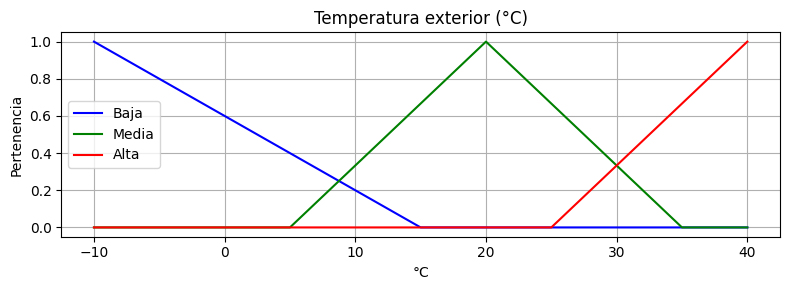

In [3]:
# ---------------------------
# Gráfico: Temperatura exterior
# ---------------------------
fig, ax1 = plt.subplots(figsize=(8, 3))

ax1.plot(x_temp_ext, temp_ext_baja, 'b', linewidth=1.5, label='Baja')
ax1.plot(x_temp_ext, temp_ext_media, 'g', linewidth=1.5, label='Media')
ax1.plot(x_temp_ext, temp_ext_alta, 'r', linewidth=1.5, label='Alta')
ax1.set_title('Temperatura exterior (°C)')
ax1.set_xlabel('°C')
ax1.set_ylabel('Pertenencia')
ax1.legend()
ax1.grid(True)

plt.tight_layout()

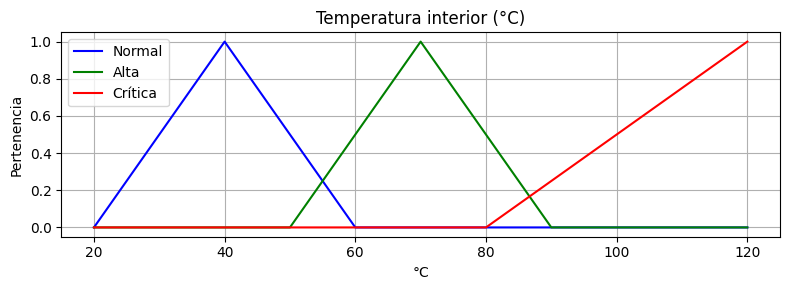

In [4]:
# ---------------------------
# Gráfico: Temperatura interior
# ---------------------------
fig, ax2 = plt.subplots(figsize=(8, 3))

ax2.plot(x_temp_int, temp_int_normal, 'b', linewidth=1.5, label='Normal')
ax2.plot(x_temp_int, temp_int_alta, 'g', linewidth=1.5, label='Alta')
ax2.plot(x_temp_int, temp_int_critica, 'r', linewidth=1.5, label='Crítica')
ax2.set_title('Temperatura interior (°C)')
ax2.set_xlabel('°C')
ax2.set_ylabel('Pertenencia')
ax2.legend()
ax2.grid(True)

plt.tight_layout()

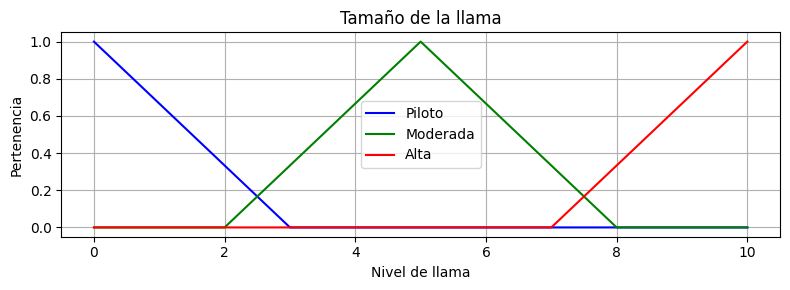

In [5]:
# ---------------------------
# Gráfico: Tamaño de la llama
# ---------------------------
fig, ax3 = plt.subplots(figsize=(8, 3))

ax3.plot(x_llama, llama_piloto, 'b', linewidth=1.5, label='Piloto')
ax3.plot(x_llama, llama_moderada, 'g', linewidth=1.5, label='Moderada')
ax3.plot(x_llama, llama_alta, 'r', linewidth=1.5, label='Alta')
ax3.set_title('Tamaño de la llama')
ax3.set_xlabel('Nivel de llama')
ax3.set_ylabel('Pertenencia')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

In [6]:
# Entrada del usuario
TExt = 40   # Temperatura exterior (°C)
TInt = 120   # Temperatura interior (°C)

In [7]:
# Grado de pertenencia a cada conjunto (entrada 1: temperatura exterior)
ext_baja = fuzz.interp_membership(x_temp_ext, temp_ext_baja, TExt)
ext_media = fuzz.interp_membership(x_temp_ext, temp_ext_media, TExt)
ext_alta = fuzz.interp_membership(x_temp_ext, temp_ext_alta, TExt)

# Grado de pertenencia a cada conjunto (entrada 2: temperatura interior)
int_normal = fuzz.interp_membership(x_temp_int, temp_int_normal, TInt)
int_alta = fuzz.interp_membership(x_temp_int, temp_int_alta, TInt)
int_critica = fuzz.interp_membership(x_temp_int, temp_int_critica, TInt)

# ---------------------
# Aplicación de las 9 reglas con operador AND (np.fmin)
# ---------------------

# 1. Exterior baja AND Interior normal → llama alta
rule1 = np.fmin(ext_baja, int_normal)
llama_rule1 = np.fmin(rule1, llama_alta)

# 2. Exterior baja AND Interior alta → llama moderada
rule2 = np.fmin(ext_baja, int_alta)
llama_rule2 = np.fmin(rule2, llama_moderada)

# 3. Exterior baja AND Interior crítica → llama piloto
rule3 = np.fmin(ext_baja, int_critica)
llama_rule3 = np.fmin(rule3, llama_piloto)

# 4. Exterior media AND Interior normal → llama moderada
rule4 = np.fmin(ext_media, int_normal)
llama_rule4 = np.fmin(rule4, llama_moderada)

# 5. Exterior media AND Interior alta → llama piloto
rule5 = np.fmin(ext_media, int_alta)
llama_rule5 = np.fmin(rule5, llama_piloto)

# 6. Exterior media AND Interior crítica → llama piloto
rule6 = np.fmin(ext_media, int_critica)
llama_rule6 = np.fmin(rule6, llama_piloto)

# 7. Exterior alta AND Interior normal → llama piloto
rule7 = np.fmin(ext_alta, int_normal)
llama_rule7 = np.fmin(rule7, llama_piloto)

# 8. Exterior alta AND Interior alta → llama piloto
rule8 = np.fmin(ext_alta, int_alta)
llama_rule8 = np.fmin(rule8, llama_piloto)

# 9. Exterior alta AND Interior crítica → llama piloto
rule9 = np.fmin(ext_alta, int_critica)
llama_rule9 = np.fmin(rule9, llama_piloto)


# Agregación de todas las salidas activadas por las reglas
llama_aggregated = np.fmax(
    llama_rule1,
    np.fmax(llama_rule2,
    np.fmax(llama_rule3,
    np.fmax(llama_rule4,
    np.fmax(llama_rule5,
    np.fmax(llama_rule6,
    np.fmax(llama_rule7,
    np.fmax(llama_rule8,
            llama_rule9))))))))

# Defuzzificación: obtenemos un único valor de salida
llama_final = fuzz.defuzz(x_llama, llama_aggregated, 'centroid')

# Grado de pertenencia del resultado en la curva agregada
llama_activation = fuzz.interp_membership(x_llama, llama_aggregated, llama_final)


1.0000000000000002


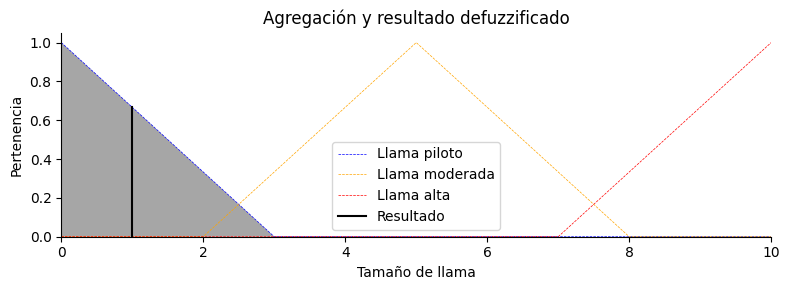

In [8]:
# Graficamos la curva de salida agregada y el valor defuzzificado
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(x_llama, llama_piloto, 'b--', linewidth=0.5, label='Llama piloto')
ax.plot(x_llama, llama_moderada, 'orange', linestyle='--', linewidth=0.5, label='Llama moderada')
ax.plot(x_llama, llama_alta, 'r--', linewidth=0.5, label='Llama alta')

# Área de la agregación
ax.fill_between(x_llama, np.zeros_like(x_llama), llama_aggregated, facecolor='gray', alpha=0.7)

# Línea vertical en el valor defuzzificado
ax.plot([llama_final, llama_final], [0, llama_activation], 'k', linewidth=1.5, label='Resultado')

print(llama_final)

ax.set_title('Agregación y resultado defuzzificado')
ax.set_xlabel('Tamaño de llama')
ax.set_ylabel('Pertenencia')
ax.set_xlim([0, 10])
ax.set_ylim([0, 1.05])
ax.legend()

# Sacamos los bordes extra
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
